Classify radar return signal from the ionosphere as __good__ and __bad__ signal. For more information, read the __ionosphere.names__ file in the foloder __data__.

In [11]:
import numpy as np
from neurnet import neurnet
from read_iono import iono_data
import matplotlib.pyplot as plt

Get the training data

In [12]:
iono = iono_data()
x_train, y_train = iono.get_train()

Design the neural network
- __num_ins__ :number of neurons in the input layer

- __num_layers__ :number of neurons in the hidden layers
- __num_layers__ = [] if the is no hidden layer
- __num_outs__ :number of neurons in the output layer
- __afuns__ : list of activation functions in the network
- __lfun__ : loss function
    - __BCE__ for binary classification 



In [13]:
num_ins = x_train.shape[0] 
num_layers = [10, 5]
num_outs = y_train.shape[0]
afuns = ['relu','relu', 'sigmoid']
lfun = 'BCE'

Train the network

In [14]:
nnet = neurnet(num_ins, num_layers, num_outs, x_train, afuns, y_train, lfun)
nnet.initnet()

Calculate the loss as a function of epoch

In [15]:
loss = np.full(300, np.nan)
for i in range(300):
    nnet.update_network(0.25)
    l = nnet.net_loss()[-1]
    loss[i] = np.mean(np.abs(l[0,:]))

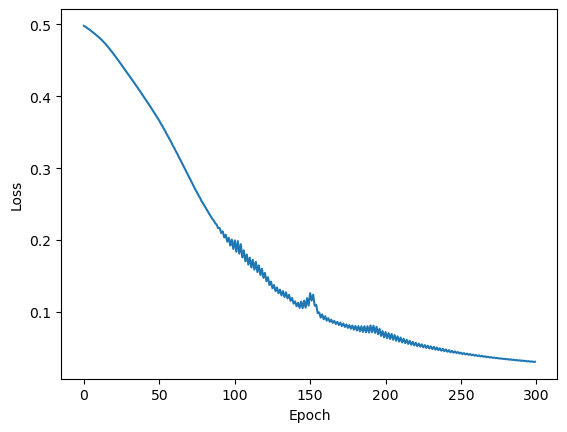

In [16]:
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Test the trained neural network on the test data

In [17]:
x_test, y_test = iono.get_test()
nnet.input = x_test
y_p = nnet.ffn()[1][-1]
y_p[y_p<0.5] = 0
y_p[y_p>=0.5] = 1
y_p = y_p.astype(int)

Calculate performance of the model

In [19]:
inds_fail = np.argwhere(np.abs(y_p[0,:]-y_test[0,:])>0)[:,0]
size_test = y_test.size
size_fail = inds_fail.size
p = 100*(size_test-size_fail)/size_test
print(str(p)+'%')

90.0%
